In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
mtcars = pd.read_csv('mtcars (1).csv')
mtcars.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
model    32 non-null object
mpg      32 non-null float64
cyl      32 non-null int64
disp     32 non-null float64
hp       32 non-null int64
drat     32 non-null float64
wt       32 non-null float64
qsec     32 non-null float64
vs       32 non-null int64
am       32 non-null int64
gear     32 non-null int64
carb     32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


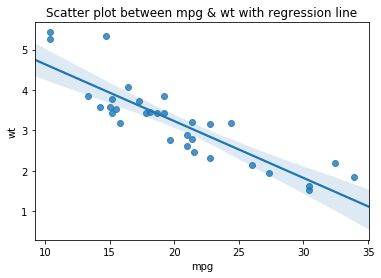

In [16]:
sns.regplot(x = mtcars.mpg , y = mtcars.wt)
plt.title('Scatter plot between mpg & wt with regression line')
plt.show()


In [17]:
mtcars[['mpg','wt']].corr()

,mpg,wt
mpg,1.000000,-0.867659
wt,-0.867659,1.000000


There is a strong negative linear relationship between miles per gallon and the weight of the car since the correlation coefficient is -87%

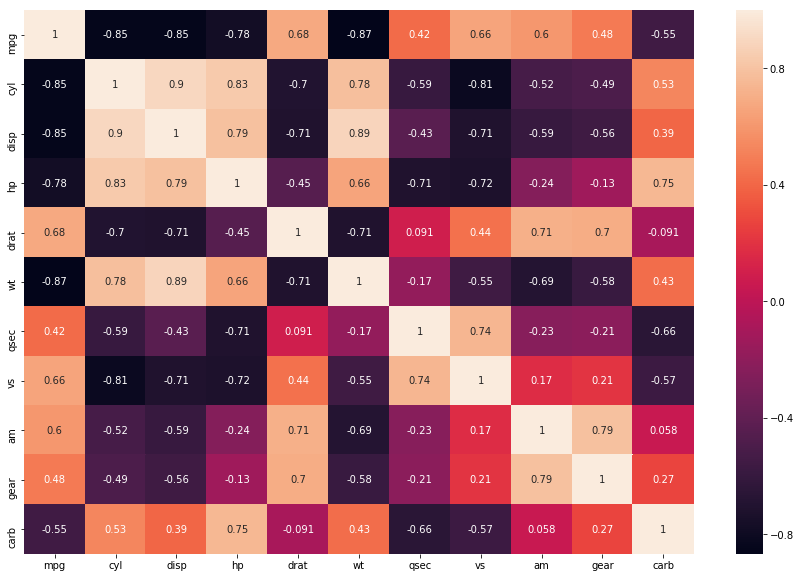

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(mtcars.corr(), annot = True)
plt.show()

In [22]:
mtcars.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


## Linear Regression using Statsmodels.


In [23]:
mtcars.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [34]:
x = mtcars[['cyl', 'disp', 'hp', 'wt']]
y = mtcars.mpg

In [35]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
predictions = model.predict(x)

#Model Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     37.84
Date:                Mon, 04 Nov 2019   Prob (F-statistic):           1.06e-10
Time:                        20:27:49   Log-Likelihood:                -72.169
No. Observations:                  32   AIC:                             154.3
Df Residuals:                      27   BIC:                             161.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.8285      2.757     14.807      0.000      35.171      46.486
cyl           -1.2933      0.656     -1.972      0.059      -2.639       0.052
disp           0.0116      0.012      0.989      0.331      -0.012       0.036
hp            -0.0205      0.012     -1.691      0.102      -0.045       0.004
wt            -3.8539      1.015     -3.795      0.001      -5.937      -1.770
==============================================================================
Omnibus:                        5.747   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.056   Jarque-Bera (JB):                4.290
Skew:                           0.859   Prob(JB):                        0.117
Kurtosis:                       3.518   Cond. No.                     1.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
 # calculate SSE, SSM & SST

SSE   = 0
SST   = 0

for i in range(len(predictions)):
    SSE    += (predictions[i] - y[i])**2

yMean       = np.mean(y)

for i in range(len(predictions)):
    SST    += (y[i] - yMean)**2

print('SSE = %5.4f SST = %5.4f' % (SSE, SST))

Rsq = np.round(1 - (SSE / SST),4)

print("Calculated %s = %1.3f" % ("R squared value",Rsq) )     

SSE = 170.4444 SST = 1126.0472
Calculated R squared value = 0.849


# Explanation

#### The coefficient of -3.8539 means that as the wt variable increases by 1 unit, the predicted value of mpg decreases by 3.85395. 
#### The coefficient of -0.0205 means that as the hp variable increases by 1 unit, the predicted value of mpg decreases by  0.0205. 
#### The coefficient of -1.2933 means that as the cyl variable increases by 1 unit, the predicted value of mpg decreases by  1.2933. 
#### The coefficient of 0.0116 means that as the disp variable increases by 1 unit, the predicted value of mpg increases by 0.0116. 


* R squared give the percentage of variance our model explains. Our model explains 84.9% of variation
* Standard error is the standard deviation of the sampling distribution of a statistic such as mean.
* The t scores and p-values for the hypothesis test the wt,hp,cyl,disp has statistically significant p-value at 5% level of significance since p-value is less than 5%. 
* There is a 95% confidence intervals for the wt,hp,cyl,disp.


## Linear Regression using Sklearn:

In [37]:
from sklearn import linear_model

In [38]:
lm = linear_model.LinearRegression()

In [39]:
model_new = lm.fit(x,y)

In [40]:
predctions_new = lm.predict(x)

In [41]:
print('R square is %1.3f' %lm.score(x, y))

R square is 0.849


# Residual plots:

#### Residual plot is a scatter plot of fitted values against the residuals, with a *locally weighted scatterplot smoothing (lowess)* regression line showing any apparent trend.

#### Using seaborn, residplot() with fitted values as x parameter, and the dependent variable as y.  The argument, lowless = True makes sure the lowess regression line is drawn.

+ *Lowess stands for Locally wighted least sqaures.*
+ *Lowess is a data analysis technique for producing a **Smooth** set of values from a scatter plot with a *noisy* relationship between the two variables.


In [43]:
sns.set(style="whitegrid")
import statsmodels.api as sm

x = sm.add_constant(x) # Add an intercept to our model

model                 = sm.OLS(y, x).fit() ## OLS(output, input)
mtcars['predictions']   = model.predict(x)
residuals             = model.resid

C:\Users\Ashish Barik\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


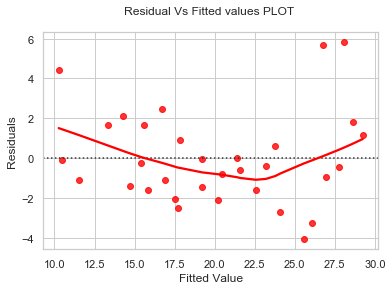

In [44]:
# Plot the residuals after fitting a linear model
ax = sns.residplot(mtcars.predictions, residuals, lowess = True, color = "red")
ax.set(xlabel='Fitted Value', ylabel='Residuals', title = 'Residual Vs Fitted values PLOT \n')
plt.show()

## Histogram of the residuals:

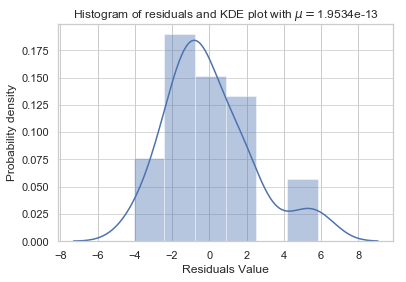

In [45]:
sns.set(style="whitegrid")
sns.distplot(residuals)

plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Residuals Value')
plt.ylabel('Probability density') # It is the probability per unit on the x-axis.

mean     =   residuals.mean()

plt.title('Histogram of residuals and KDE plot with ' + r'$\mu = $' + str(np.round(mean,17)))
plt.show()

# Normal QQ Plot 

#### This plot shows how well the distribution of residuals fit the normal distribution.

#### This plots the z score of the residuals against the theoretical normal quantiles. 

#### Any thing quite off the diagonal lines may be a concern for further investigation.

In [46]:
from statsmodels.graphics.gofplots import ProbPlot

model_fit_y               = model.fittedvalues
model_residuals           = model.resid # Model residuals


### Normalized residuals
model_normal_residuals    = model.get_influence().resid_studentized_internal 

### absolute squared normalized residuals
model_normal_residuals_abs_sqrt  = np.sqrt(np.abs(model_normal_residuals)) 

### absolute residuals
model_abs_resid                  = np.abs(model_residuals) 

### leverage 
model_leverage                   = model.get_influence().hat_matrix_diag 

### Cook's distance
model_cooks                      = model.get_influence().cooks_distance[0] 

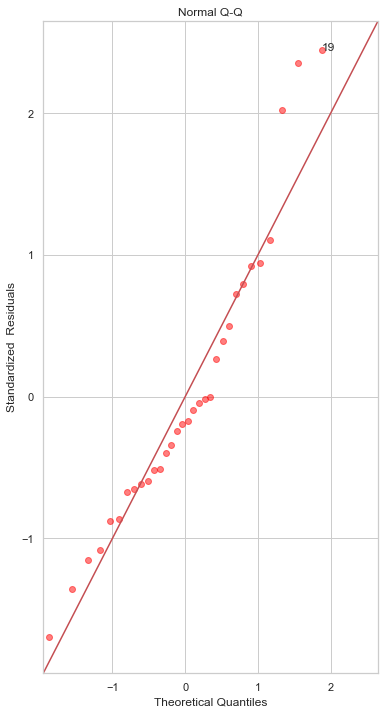

In [49]:
QQ         = ProbPlot(model_normal_residuals)
plot_lm_2  = QQ.qqplot(line = '45', alpha = 0.5, color = 'red', lw = 1.5)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figheight(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized  Residuals')

# annotations

abs_norm_resid       = np.flip(np.argsort(np.abs(model_normal_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
     plot_lm_2.axes[0].annotate(i, 
            xy = (np.flip(QQ.theoretical_quantiles, 0)[r],
            model_normal_residuals[i]));
     plt.show()

# Inference

There are many deviations from the straight line and hence the residuals do not fit the normal distribution.